SECTION 1: DECLARE THE MODULES

In [ ]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

SECTION 2: Data import and preprocess

In [ ]:
!pip install wget
import wget

link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data)

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=ee467cb3524f94ac46576bcf9d0706eef3bde060902625815ab4c30c4c428f80
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
DataSet

'training_attack_types.txt'

In [ ]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']


# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names
# file, but it is supposed to be a binary feature according to the
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [ ]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [ ]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

In [ ]:
#Processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'



train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)

In [ ]:
#Processing test Data
test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

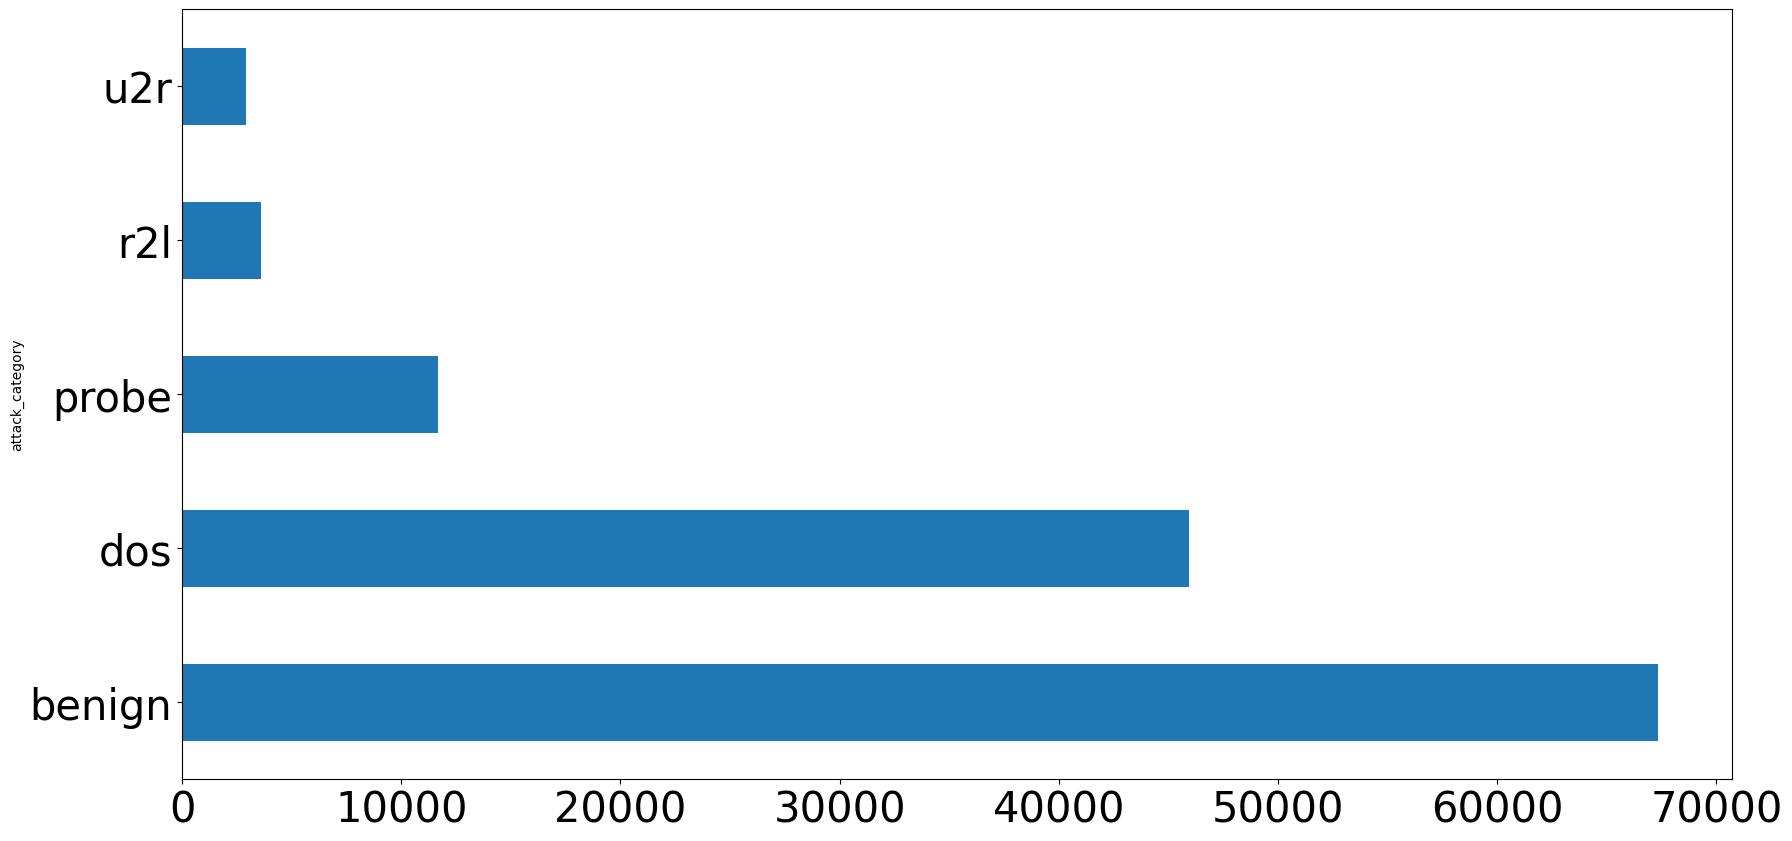

In [ ]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

#Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')



#Data Preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Experimenting with MaxAbsScaler on the single 'duration' feature
from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])

train_x.describe()



train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)

SECTION 3: Multi class classification

Decision tree

In [ ]:
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn import metrics

# Set the desired parameters directly
classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5, random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)



results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

# Calculate and print metrics
accuracy_score = metrics.accuracy_score(test_Y, pred_y)
precision = metrics.precision_score(test_Y, pred_y, average='weighted') # Assuming weighted average for multi-class
recall = metrics.recall_score(test_Y, pred_y, average='weighted') # Assuming weighted average for multi-class
f1_score = metrics.f1_score(test_Y, pred_y, average='weighted') # Assuming weighted average for multi-class

# For FPR, you'll need to decide how to handle multi-class
# Here's one way using label binarization:
fpr = metrics.roc_auc_score(test_Y_bin, classifier.predict_proba(test_x)[:,1])

print(results)
print("error:",error)
print("Accuracy Score:", accuracy_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("FPR:", fpr)

[[8965   62  682    1    1]
 [1492 6069   75    0    0]
 [ 659  239 1525    0    0]
 [2073    0  344  157    0]
 [ 187    1    1    6    5]]
error: 0.25829488999290273
Accuracy Score: 0.7417051100070973
Precision: 0.7904550630658624
Recall: 0.7417051100070973
F1 Score: 0.7064953145401099
FPR: 0.6518777899081315


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score # Import accuracy_score
gnb = GaussianNB(priors=None, var_smoothing=1e-9)
gnb.fit(train_x, train_Y)
gnb_pred_y =gnb.predict(test_x)
error = zero_one_loss(test_Y, gnb_pred_y)
gnb_results = confusion_matrix(test_Y, gnb_pred_y)
# Calculate and print metrics
accuracy_score = metrics.accuracy_score(test_Y, gnb_pred_y)
precision = metrics.precision_score(test_Y, gnb_pred_y, average='weighted') # Assuming weighted average for multi-class
recall = metrics.recall_score(test_Y, gnb_pred_y, average='weighted') # Assuming weighted average for multi-class
f1_score = metrics.f1_score(test_Y, gnb_pred_y, average='weighted') # Assuming weighted average for multi-class

# For FPR, you'll need to decide how to handle multi-class
# Here's one way using label binarization:
fpr = metrics.roc_auc_score(test_Y_bin, gnb.predict_proba(test_x)[:,1])

print(gnb_results)
print("error:",error)
print("Accuracy Score:", accuracy_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("FPR:", fpr)



[[6756   62   10 2599  284]
 [3400 3162    4 1041   29]
 [1382  345  237  323  136]
 [1113    3    6  933  519]
 [ 115    0    0   22   63]]
error: 0.5053672817601136
Accuracy Score: 0.49463271823988647
Precision: 0.6491192048215554
Recall: 0.49463271823988647
F1 Score: 0.4984205875192054
FPR: 0.5880263707486257


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Use RandomForestClassifier for classification

rf = RandomForestClassifier(n_estimators=20, random_state=0) # Change variable name to reflect the change in model type
rf.fit(train_x, train_Y)
rf_pred_y = rf.predict(test_x)
error = zero_one_loss(test_Y, rf_pred_y)

# Calculate and print metrics
accuracy_score = metrics.accuracy_score(test_Y, rf_pred_y)
precision = metrics.precision_score(test_Y, rf_pred_y, average='weighted') # Assuming weighted average for multi-class
recall = metrics.recall_score(test_Y, rf_pred_y, average='weighted') # Assuming weighted average for multi-class
f1_score = metrics.f1_score(test_Y, rf_pred_y, average='weighted') # Assuming weighted average for multi-class
rf_results = confusion_matrix(test_Y, rf_pred_y)
# For FPR, you'll need to decide how to handle multi-class
# Here's one way using label binarization:
fpr = metrics.roc_auc_score(test_Y_bin, rf.predict_proba(test_x)[:,1])

print(rf_results)
print("error:",error)
print("Accuracy Score:", accuracy_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("FPR:", fpr)

[[9445   67  197    1    1]
 [1561 5988   87    0    0]
 [ 785  164 1474    0    0]
 [2519    0    0   54    1]
 [ 194    0    0    3    3]]
error: 0.24751596877217885
Accuracy Score: 0.7524840312278211
Precision: 0.8083845132534387
Recall: 0.7524840312278211
F1 Score: 0.7095384141675325
FPR: 0.798111779688832


SVM

In [ ]:
from sklearn.svm import SVC
sv = SVC(kernel='linear', probability=True) # Set probability to True
sv.fit(train_x, train_Y)

sv_pred_y = sv.predict(test_x)

error = zero_one_loss(test_Y, sv_pred_y)

# Calculate and print metrics
accuracy_score = metrics.accuracy_score(test_Y, sv_pred_y)
precision = metrics.precision_score(test_Y, sv_pred_y, average='weighted') # Assuming weighted average for multi-class
recall = metrics.recall_score(test_Y, sv_pred_y, average='weighted') # Assuming weighted average for multi-class
f1_score = metrics.f1_score(test_Y, sv_pred_y, average='weighted') # Assuming weighted average for multi-class
sv_results = confusion_matrix(test_Y, sv_pred_y)
# For FPR, you'll need to decide how to handle multi-class
# Here's one way using label binarization:
fpr = metrics.roc_auc_score(test_Y_bin, sv.predict_proba(test_x)[:,1])

print(sv_results)
print("error:",error)
print("Accuracy Score:", accuracy_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("FPR:", fpr)

[[9040  225  437    4    5]
 [1445 6179   12    0    0]
 [ 720  115 1588    0    0]
 [2291    1    2  275    5]
 [ 180    1    0    3   16]]
error: 0.2415720369056068
Accuracy Score: 0.7584279630943932
Precision: 0.806194897901349
Recall: 0.7584279630943932
F1 Score: 0.7284289265696258
FPR: 0.725469087887514


MLP classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(train_x, train_Y)

mlp_pred_y = mlp.predict(test_x)

error = zero_one_loss(test_Y, mlp_pred_y)

# Calculate and print metrics
accuracy_score = metrics.accuracy_score(test_Y, mlp_pred_y)
precision = metrics.precision_score(test_Y, mlp_pred_y, average='weighted') # Assuming weighted average for multi-class
recall = metrics.recall_score(test_Y, mlp_pred_y, average='weighted') # Assuming weighted average for multi-class
f1_score = metrics.f1_score(test_Y, mlp_pred_y, average='weighted') # Assuming weighted average for multi-class
mlp_results = confusion_matrix(test_Y, mlp_pred_y)
# For FPR, you'll need to decide how to handle multi-class
# Here's one way using label binarization:
fpr = metrics.roc_auc_score(test_Y_bin, mlp.predict_proba(test_x)[:,1])

print(mlp_results)
print("error:",error)
print("Accuracy Score:", accuracy_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("FPR:", fpr)

[[9040  402  230   39    0]
 [1803 5664  168    1    0]
 [ 528  165 1730    0    0]
 [1933  295    2  344    0]
 [ 178    9    2   11    0]]
error: 0.25576650106458476
Accuracy Score: 0.7442334989354152
Precision: 0.7690517470870857
Recall: 0.7442334989354152
F1 Score: 0.714656449956912
FPR: 0.7219969276029565


Plotting accuracy rate

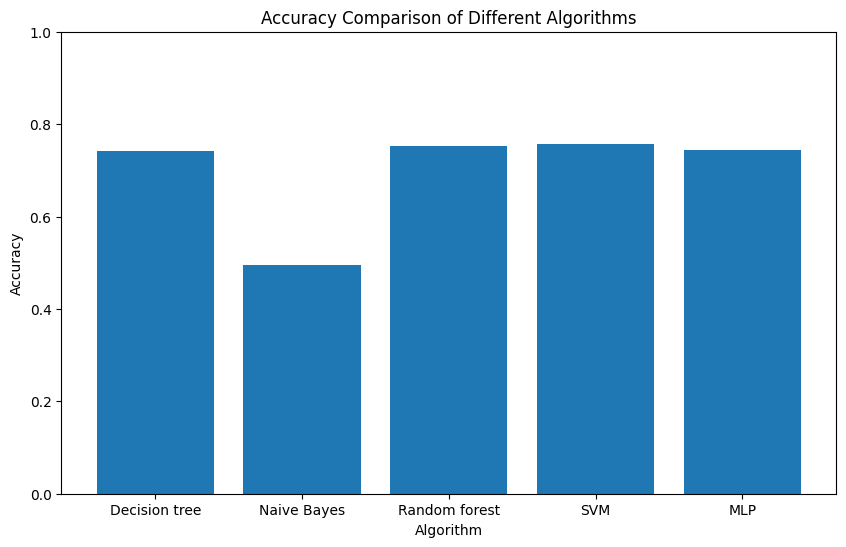

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the accuracy scores for each algorithm stored in variables
# For example:
dt_accuracy = 0.741
nb_accuracy = 0.494
rf_accuracy = 0.752
svm_accuracy = 0.758
mlp_accuracy = 0.744

# Create a list of algorithm names and their corresponding accuracies
algorithms = ['Decision tree', 'Naive Bayes', 'Random forest', 'SVM', 'MLP']
accuracies = [dt_accuracy, nb_accuracy, rf_accuracy, svm_accuracy, mlp_accuracy]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Algorithms')
plt.ylim(0, 1)  # Set y-axis limits to be between 0 and 1 for accuracy
plt.show()

**IoT Dataset**

Importing libraries

In [ ]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always')

In [ ]:
#uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

import io

dataset = pd.read_csv(io.BytesIO(uploaded['Processed_Combined_IoT_dataset.csv']))

Saving Processed_Combined_IoT_dataset.csv to Processed_Combined_IoT_dataset.csv


In [ ]:
dataset.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [ ]:
print(dataset.shape)

(401119, 18)


In [ ]:
print(list(dataset.columns))

['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status', 'label']


In [ ]:
target_cols=list(dataset.columns[-1:])
target_cols

['label']

In [ ]:
feature_cols= list(dataset.columns[:-1])
feature_cols

['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'current_temperature',
 'door_state',
 'fridge_temperature',
 'humidity',
 'latitude',
 'light_status',
 'longitude',
 'motion_status',
 'pressure',
 'sphone_signal',
 'temp_condition',
 'temperature',
 'thermostat_status']

**Split Dataset**

In [ ]:
#split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

In [ ]:
X.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [ ]:
y.head()

,label
0,0
1,0
2,0
3,0
4,0


**Splitting Data**

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (280783, 17)
X_test shape  is :  (120336, 17)
y_train shape is :  (280783,)
y_test shape is  :  (120336,)


**Building Model**

**Random Forest**

In [ ]:
#Calculate start time
start = timeit.default_timer()

#Create a randomk forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [ ]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

**Evaluating Model**

In [ ]:
print("Randomforest:")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Randomforest:
[[69911  3584]
 [12073 34768]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     73495
           1       0.91      0.74      0.82     46841

    accuracy                           0.87    120336
   macro avg       0.88      0.85      0.86    120336
weighted avg       0.87      0.87      0.87    120336



In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time)

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8698893099321898
Precision: 0.9065498539841469
Recall: 0.7422557161461113
F1 Score: 0.8162172948481683
Mean Absolute Error: 0.13011069006781012
Cohens kappa: 0.7170549499569777
ROC AUC: 0.8467452470110787
Train Time(s):  82.861363299
Test Time(s):  7.769517299999734


Naive bayes

In [ ]:
#Calculate start time
start = timeit.default_timer()
#Create a Gaussian Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start


Best Hyperparameters: {'var_smoothing': 0.0002310129700083158}


In [ ]:
#Calculate start time
start = timeit.default_timer()


# Use the best estimator to make predictions
best_gnb = grid_search.best_estimator_
y_pred = best_gnb.predict(X_test)


#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

**Evaluating Model**

In [ ]:
print("Naive Bayes")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Naive Bayes
[[68765  4730]
 [31387 15454]]
              precision    recall  f1-score   support

           0       0.69      0.94      0.79     73495
           1       0.77      0.33      0.46     46841

    accuracy                           0.70    120336
   macro avg       0.73      0.63      0.63    120336
weighted avg       0.72      0.70      0.66    120336



In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time)

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.6998653769445552
Precision: 0.7656559651208878
Recall: 0.32992463867124955
F1 Score: 0.46114136516225285
Mean Absolute Error: 0.30013462305544475
Cohens kappa: 0.2961252376953648
ROC AUC: 0.6327832595356384
Train Time(s):  82.48304460899999
Test Time(s):  0.05442954600039229


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Calculate start time
start = timeit.default_timer()


#Create a dt Classifier
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5, random_state=17)

#Train the model using the training sets
# y_pred=clf.predict(X_test)
dt.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start



In [ ]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=dt.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

Evaluating Model

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[70512  2983]
 [21237 25604]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.85     73495
           1       0.90      0.55      0.68     46841

    accuracy                           0.80    120336
   macro avg       0.83      0.75      0.77    120336
weighted avg       0.82      0.80      0.79    120336



In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time)

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.7987302220449408
Precision: 0.8956518697309966
Recall: 0.5466151448517325
F1 Score: 0.6788990825688074
Mean Absolute Error: 0.20126977795505918
Cohens kappa: 0.54450498293766
ROC AUC: 0.7530136748818155
Train Time(s):  1.0691636900000958
Test Time(s):  0.019127499000205717


**Logistic regression**

In [ ]:
#Calculate start time
start = timeit.default_timer()
#Create a LG Classifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


#Train the model using the training sets y_pred=clf.predict(X_test)
lr.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [ ]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred =lr.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[71660  1835]
 [35688 11153]]
              precision    recall  f1-score   support

           0       0.67      0.98      0.79     73495
           1       0.86      0.24      0.37     46841

    accuracy                           0.69    120336
   macro avg       0.76      0.61      0.58    120336
weighted avg       0.74      0.69      0.63    120336



In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time)

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.6881814253423747
Precision: 0.8587157376039422
Recall: 0.23810337097841636
F1 Score: 0.3728292299720872
Mean Absolute Error: 0.3118185746576253
Cohens kappa: 0.24528030524565902
ROC AUC: 0.6065678430509471
Train Time(s):  4.2634038070000315
Test Time(s):  0.013632064999910654


**ADA Boost**

In [ ]:
#Calculate start time
start = timeit.default_timer()
#Create a ADAboost Classifier
from sklearn.ensemble import AdaBoostClassifier # Import from the correct module
ada = AdaBoostClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
ada.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start


In [ ]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=ada.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[70564  2931]
 [20908 25933]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86     73495
           1       0.90      0.55      0.69     46841

    accuracy                           0.80    120336
   macro avg       0.83      0.76      0.77    120336
weighted avg       0.82      0.80      0.79    120336



In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time)

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8018963568674379
Precision: 0.898454822616408
Recall: 0.5536389060865481
F1 Score: 0.6851066640248332
Mean Absolute Error: 0.19810364313256215
Cohens kappa: 0.5521870014369055
ROC AUC: 0.7568793210615066
Train Time(s):  21.828677943999992
Test Time(s):  1.464632248000271


Plotting accuracy rate

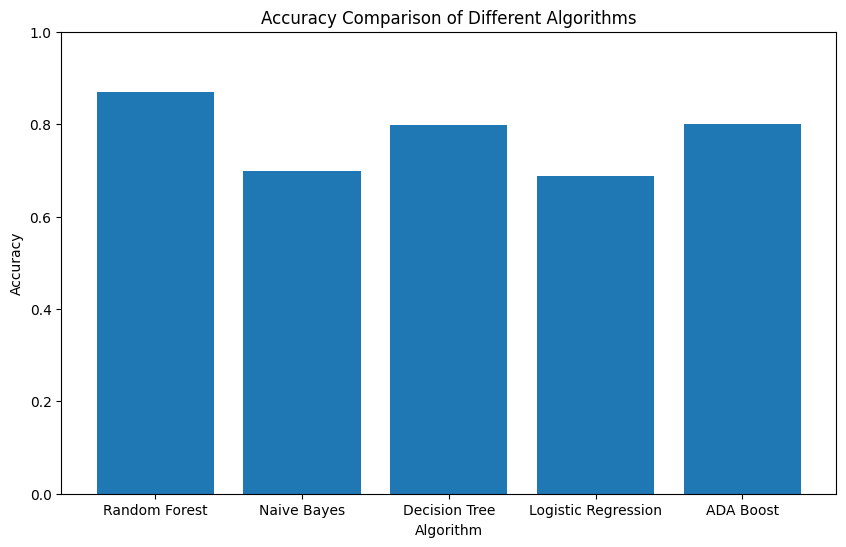

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the accuracy scores for each algorithm stored in variables
# For example:
rf_accuracy = 0.869
nb_accuracy = 0.699
dt_accuracy = 0.798
lr_accuracy = 0.688
ada_accuracy = 0.801

# Create a list of algorithm names and their corresponding accuracies
algorithms = ['Random Forest', 'Naive Bayes', 'Decision Tree', 'Logistic Regression', 'ADA Boost']
accuracies = [rf_accuracy, nb_accuracy, dt_accuracy, lr_accuracy, ada_accuracy]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Algorithms')
plt.ylim(0, 1)  # Set y-axis limits to be between 0 and 1 for accuracy
plt.show()